EXERCISE - AUDIO PROCESSING (IF-4021 - Multimedia Information Processing)

Rayhan Fatih Gunawan
122140134
Github : [Audio-Exercise-rayhanfatihg](https://github.com/rayhanfatihg/Audio-Exercise.git)

*NOTES*
Soal pertama direkam dengan condenser mic, disambungkan ke audio interface dengan setting -20 dB

Soal kedua direkam menggunakan smartphone

Perlu diperhitungkan juga bahwa saya mempunyai suara yang sangat bass dan tenggorokan saya sedang tidak baik untuk saat perekaman ini.

In [54]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import os
import pyloudnorm as pyln
from scipy.signal import butter, filtfilt
import scipy.signal as signal

wav_folder = 'WAV'
audio_files = [os.path.join(wav_folder, f) for f in os.listdir(wav_folder) if f.endswith('.wav')]

SOAL 1: Rekaman dan Analisi suara Multi-Level

 Rekamlah suara Anda sendiri selama 25 detik dimana Anda membaca sebuah teks
 berita.

 • Dalam 25 detik rekaman tersebut, Anda harus merekam:

 – 5 detik pertama: suara sangat pelan dan berbisik
 
 – 5 detik kedua: suara normal
 
 – 5 detik ketiga: suara keras
 
 – 5 detik keempat: suara cempreng (dibuat-buat cempreng)
 
 – 5 detik terakhir: suara berteriak
 
 • Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke note
book).
 
 • Visualisasikan waveform dan spektogram dari rekaman suara Anda.
 
 • Sertakan penjelasan singkat mengenai hasil visualisasi tersebut.
 
 • Lakukanresamplingpadafile audio Andakemudianbandingkan kualitas dan durasinya.

Text(0.5, 1.0, 'Mel-Spectrogram - Berita.wav')

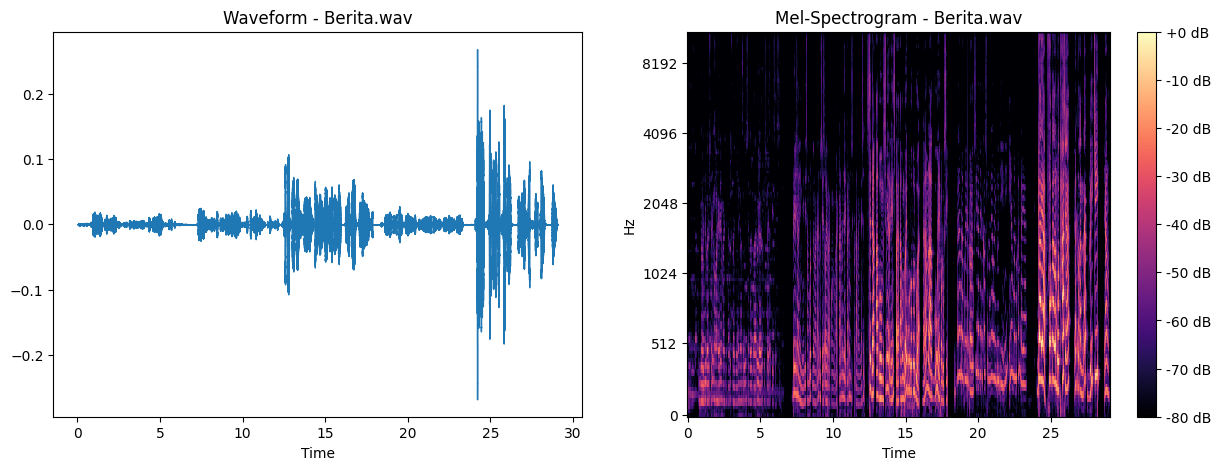

In [55]:
plt.figure(figsize=(15, 5))

audio_path = os.path.join(wav_folder, 'Berita.wav')
y, sr = librosa.load(audio_path)

plt.subplot(1, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform - {os.path.basename(audio_path)}')

plt.subplot(1, 2, 2)
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel-Spectrogram - {os.path.basename(audio_path)}')

*ANALISIS*
Rekaman suara 1 ( suara sangat pelan dan berbisik) : Dapat diketahui bahwa seperti tidak ada jeda antar ucapan yang saya lakukan, terlihat dari waveform setiap detik mempunyai puncaknya sendiri. Dapa dikethui juga dari spectogram gabungan suara saya dengan suara berisik background memenuhi ruang frekuansi tengah yang terlihat sangat acak.

Rekaman suara 2 (suara normal) : Terlihat dari waveform dan spectogram yang mempunyai celah yang merupakan pisahan antar kata yang saya ucapkan, dan di spectogram terlihat jelas karater suara normal saya yang cenderung sangat mengisi di frekuensi bawah dengan ada beberapa yang memuncak di frekuensi atas

Rekaman suara 3 (suara keras) : Terlihat dari spectogram, sekarang frekuensi tengah lebih intense dan frekuensi tinggi juga terlihat lebih intense

Rekaman suara 4 (Suara cempreng) : terlihat dari mel spectogram frekuensi paling bawah tidak begitu intense daripada seblumnya, dan frekuensi tinggi tidak lebih intense dari suara keras saya. Mungkin karena karakter suara saya yang sangat berlawanan daripada task ini

Rekaman suara 5 (suara berteriak) : Terlihat dari spectogram, pada saat berteriak suara di frekuensi rendah tidak intense dan digantikan frekuensi tengah ke tinggi yang lebih intense

In [56]:
target_sr = 44100
resampled_signals = []
original_files = []

def save_audio_if_not_exists(audio_data, sample_rate, output_path):
    if os.path.exists(output_path):
        print(f"Output file already exists: {os.path.basename(output_path)}")
        return False
    sf.write(output_path, audio_data, sample_rate)
    print(f"Successfully saved: {os.path.basename(output_path)}")
    return True

for audio_path in audio_files:
    if audio_path.endswith('Berita.wav'):
        y, sr = librosa.load(audio_path)
        y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
        resampled_signals.append(y_resampled)
        original_files.append(audio_path)
        
        output_path = os.path.join('WAV', f'resampled_{os.path.basename(audio_path)}')
        save_audio_if_not_exists(y_resampled, target_sr, output_path)

Successfully saved: resampled_Berita.wav


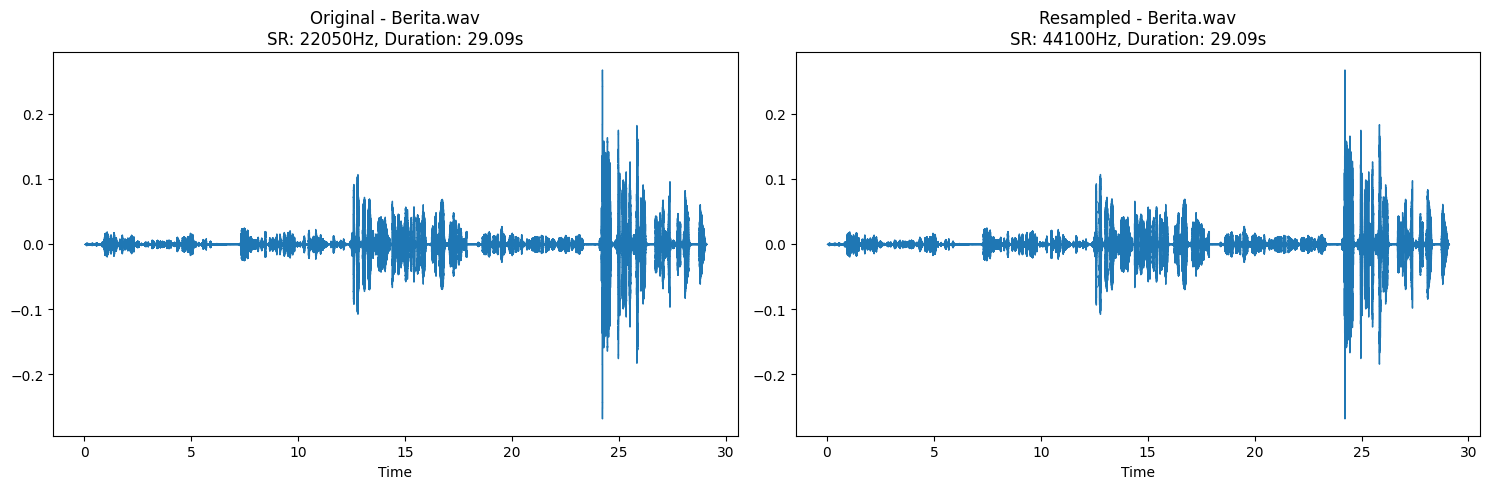

In [57]:
if resampled_signals:
    plt.figure(figsize=(15, 5))

    for i, (audio_path, resampled) in enumerate(zip(original_files, resampled_signals), 1):
        y_orig, sr_orig = librosa.load(audio_path)
        
        duration_orig = len(y_orig) / sr_orig
        duration_resampled = len(resampled) / target_sr
        
        plt.subplot(1, 2, 1)
        librosa.display.waveshow(y_orig, sr=sr_orig)
        plt.title(f'Original - {os.path.basename(audio_path)}\nSR: {sr_orig}Hz, Duration: {duration_orig:.2f}s')
        
        plt.subplot(1, 2, 2)
        librosa.display.waveshow(resampled, sr=target_sr)
        plt.title(f'Resampled - {os.path.basename(audio_path)}\nSR: {target_sr}Hz, Duration: {duration_resampled:.2f}s')

    plt.tight_layout()

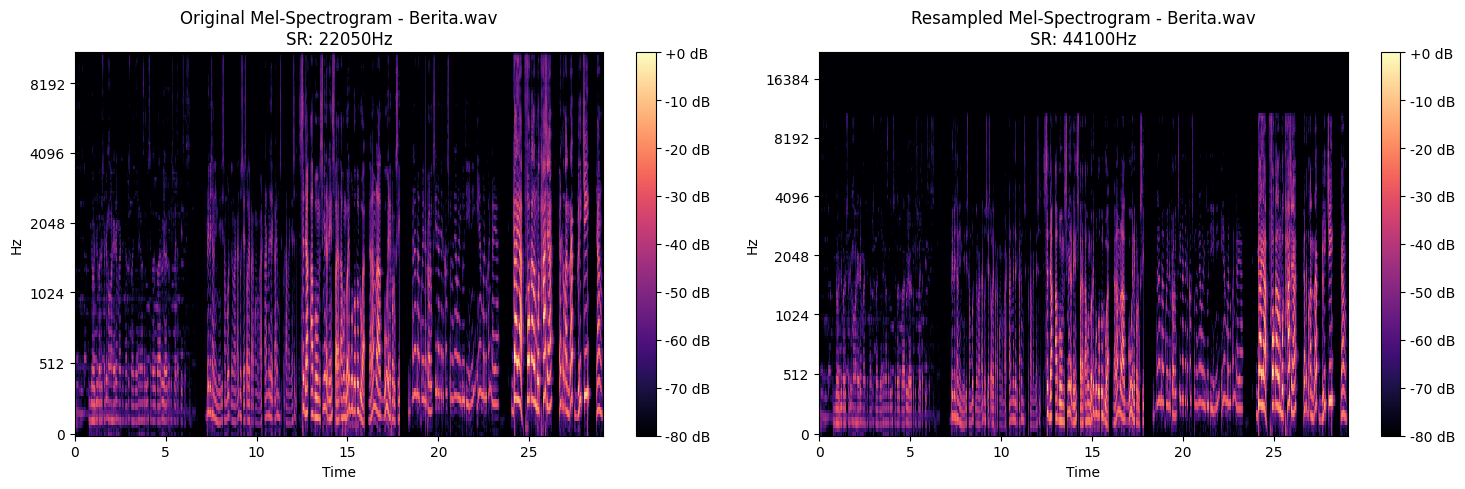

In [58]:
if resampled_signals:
    plt.figure(figsize=(15, 5))

    for i, (audio_path, resampled) in enumerate(zip(original_files, resampled_signals), 1):
        y_orig, sr_orig = librosa.load(audio_path)
        
        mel_orig = librosa.feature.melspectrogram(y=y_orig, sr=sr_orig, n_mels=128)
        mel_orig_db = librosa.power_to_db(mel_orig, ref=np.max)
        
        mel_resampled = librosa.feature.melspectrogram(y=resampled, sr=target_sr, n_mels=128)
        mel_resampled_db = librosa.power_to_db(mel_resampled, ref=np.max)
        
        plt.subplot(1, 2, 1)
        librosa.display.specshow(mel_orig_db, sr=sr_orig, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Original Mel-Spectrogram - {os.path.basename(audio_path)}\nSR: {sr_orig}Hz')
        
        plt.subplot(1, 2, 2)
        librosa.display.specshow(mel_resampled_db, sr=target_sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Resampled Mel-Spectrogram - {os.path.basename(audio_path)}\nSR: {target_sr}Hz')

    plt.tight_layout()

*ANALISIS*

Rekaman suara 1 ( suara sangat pelan dan berbisik) : Dapat diketahui bahwa seperti tidak ada jeda antar ucapan yang saya lakukan, terlihat dari waveform setiap detik mempunyai puncaknya sendiri. Dapa dikethui juga dari spectogram gabungan suara saya dengan suara berisik background memenuhi ruang frekuansi tengah yang terlihat sangat acak.

Rekaman suara 2 (suara normal) : Terlihat dari waveform dan spectogram yang mempunyai celah yang merupakan pisahan antar kata yang saya ucapkan, dan di spectogram terlihat jelas karater suara normal saya yang cenderung sangat mengisi di frekuensi bawah dengan ada beberapa yang memuncak di frekuensi atas

Rekaman suara 3 (suara keras) : Terlihat dari spectogram, sekarang frekuensi tengah lebih intense dan frekuensi tinggi juga terlihat lebih intense

Rekaman suara 4 (Suara cempreng) : terlihat dari mel spectogram frekuensi paling bawah tidak begitu intense daripada seblumnya, dan frekuensi tinggi tidak lebih intense dari suara keras saya. Mungkin karena karakter suara saya yang sangat berlawanan daripada task ini

Rekaman suara 5 (suara berteriak) : Terlihat dari spectogram, pada saat berteriak suara di frekuensi rendah tidak intense dan digantikan frekuensi tengah ke tinggi yang lebih intense

-----------------------------------------------------------------------------------------------------

Soal 2: Noise Reduction dengan filtering

 Rekamsuara Anda berbicara di sekitar objek yang berisik (seperti kipas angin, AC,
 atau mesin).
 
 – Rekaman tersebut harus berdurasi kurang lebih 10 detik.
 
 – Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke
 notebook).

 • Gunakanfilterequalisasi (high-pass, low-pass, dan band-pass) untuk menghilangkan
 noise pada rekaman tersebut.

 
 • Lakukan eksperimen dengan berbagai nilai frekuensi cutoff (misalnya 500 Hz, 1000
 Hz, 2000 Hz).
 
 • Visualisasikan hasil dari tiap filter dan bandingkan spektrogramnya.
 
 • Jelaskan:
 
 – Jenis noise yang muncul pada rekaman Anda
 
 – Filter mana yang paling efektif untuk mengurangi noise tersebut
 
 – Nilai cutoff yang memberikan hasil terbaik
 
 – Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering

Output file already exists: noise_highpass.wav
Output file already exists: noise_lowpass.wav
Output file already exists: noise_bandpass.wav


False

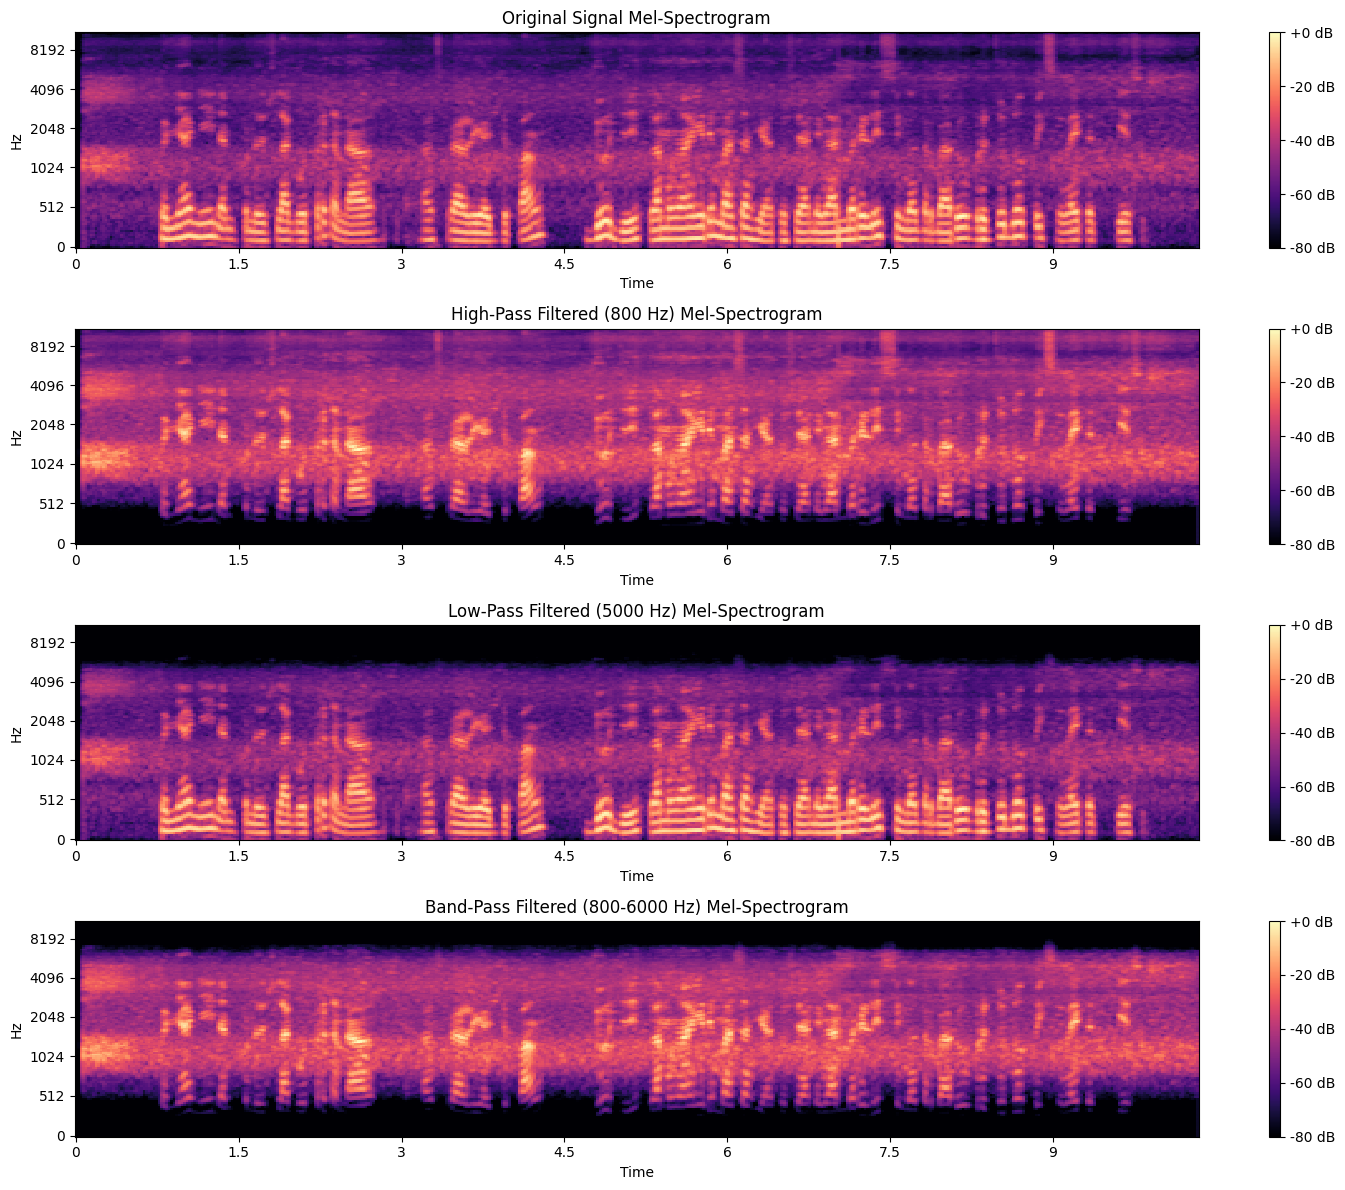

In [59]:
# Load the noise.wav file
noise_path = os.path.join('WAV', 'noise.wav')
y, sr = librosa.load(noise_path)

def apply_highpass_filter(signal, sr, cutoff_freq):
    nyquist = sr / 2
    normalized_cutoff_freq = cutoff_freq / nyquist
    b, a = butter(4, normalized_cutoff_freq, btype='high')
    return filtfilt(b, a, signal)

def apply_lowpass_filter(signal, sr, cutoff_freq):
    nyquist = sr / 2
    normalized_cutoff_freq = cutoff_freq / nyquist
    b, a = butter(4, normalized_cutoff_freq, btype='low')
    return filtfilt(b, a, signal)

def apply_bandpass_filter(signal, sr, lowcut, highcut):
    nyquist = sr / 2
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    return filtfilt(b, a, signal)

def save_audio_if_not_exists(audio_data, sample_rate, output_path):
    if os.path.exists(output_path):
        print(f"Output file already exists: {os.path.basename(output_path)}")
        return False
    sf.write(output_path, audio_data, sample_rate)
    print(f"Successfully saved: {os.path.basename(output_path)}")
    return True

# Apply filters
y_highpass = apply_highpass_filter(y, sr, 800)
y_lowpass = apply_lowpass_filter(y, sr, 5000)
y_bandpass = apply_bandpass_filter(y, sr, 800, 6000)

# Create visualization
plt.figure(figsize=(15, 12))

# Original signal
plt.subplot(4, 1, 1)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Signal Mel-Spectrogram')

# High-pass filtered
plt.subplot(4, 1, 2)
mel_spec_hp = librosa.feature.melspectrogram(y=y_highpass, sr=sr)
mel_spec_db_hp = librosa.power_to_db(mel_spec_hp, ref=np.max)
librosa.display.specshow(mel_spec_db_hp, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('High-Pass Filtered (800 Hz) Mel-Spectrogram')

# Low-pass filtered
plt.subplot(4, 1, 3)
mel_spec_lp = librosa.feature.melspectrogram(y=y_lowpass, sr=sr)
mel_spec_db_lp = librosa.power_to_db(mel_spec_lp, ref=np.max)
librosa.display.specshow(mel_spec_db_lp, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Low-Pass Filtered (5000 Hz) Mel-Spectrogram')

# Band-pass filtered
plt.subplot(4, 1, 4)
mel_spec_bp = librosa.feature.melspectrogram(y=y_bandpass, sr=sr)
mel_spec_db_bp = librosa.power_to_db(mel_spec_bp, ref=np.max)
librosa.display.specshow(mel_spec_db_bp, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Band-Pass Filtered (800-6000 Hz) Mel-Spectrogram')

plt.tight_layout()

# Save the filtered audio files with existence check
output_paths = {
    'highpass': os.path.join('WAV', 'noise_highpass.wav'),
    'lowpass': os.path.join('WAV', 'noise_lowpass.wav'),
    'bandpass': os.path.join('WAV', 'noise_bandpass.wav')
}

save_audio_if_not_exists(y_highpass, sr, output_paths['highpass'])
save_audio_if_not_exists(y_lowpass, sr, output_paths['lowpass'])
save_audio_if_not_exists(y_bandpass, sr, output_paths['bandpass'])

*1. JENIS NOISE* = White noise static

*2. FILTER TERBAIK* = Adalah low pass karena karater suara yang bass dan noise yang mengisi frekuensi tengah keatas sehingga noise tereduksi tetapi ucapan tetap jelas

*3. NILAI CUTOFF TERBAIK* = Nilai cutoff terbaik adalah memotong di 5000Hz (low pass)

*4. KUALITAS SUARA* = Noise tereduksi dan suara ucapan tetap jelas terdengar

-----------------------------------------------------------------------------------------------------

Soal 3: Pitch Shifting dan Audio Manipulation

 Lakukan pitch shifting pada rekaman suara Soal 1 untuk membuat suara terdengar
 seperti chipmunk (dengan mengubah pitch ke atas).

 • Visualisasikan waveform dan spektrogram sebelum dan sesudah pitch shifting.
 
 • Jelaskan proses pitch shifting yang Anda lakukan, termasuk:
 
 – Parameter yang digunakan
 
 – Perbedaan dalam representasi visual antara suara asli dan suara yang telah
 dimodifikasi
 
 – Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara
 
 • Gunakan dua buah pitch tinggi, misalnya pitch +7 dan pitch +12.
 
 • Gabungkan kedua rekaman yang telah di-pitch shift ke dalam satu file audio. (Gu
nakan ChatGPT / AI untuk membantu Anda dalam proses ini)

In [60]:
pitch_shift_amount = 14
shifted_signals = []
original_files = []

def save_audio_if_not_exists(audio_data, sample_rate, output_path):
    if os.path.exists(output_path):
        print(f"Output file already exists: {os.path.basename(output_path)}")
        return False
    sf.write(output_path, audio_data, sample_rate)
    print(f"Successfully saved: {os.path.basename(output_path)}")
    return True

for audio_path in audio_files:
    if audio_path.endswith('Berita.wav'):
        y, sr = librosa.load(audio_path)
        y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_shift_amount)
        shifted_signals.append(y_shifted)
        original_files.append(audio_path)
        
        output_path = os.path.join('WAV', f'pitched_{os.path.basename(audio_path)}')
        save_audio_if_not_exists(y_shifted, sr, output_path)

Successfully saved: pitched_Berita.wav


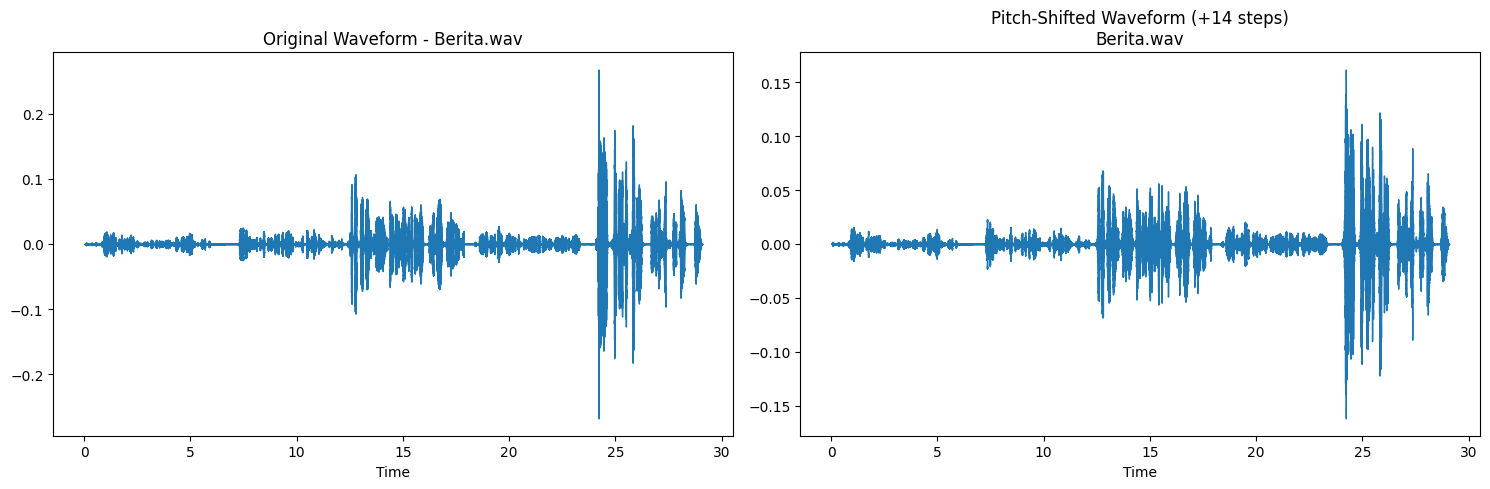

In [61]:
if shifted_signals:
    plt.figure(figsize=(15, 5))

    for i, (audio_path, shifted) in enumerate(zip(original_files, shifted_signals), 1):
        y_orig, sr = librosa.load(audio_path)
        
        plt.subplot(1, 2, 1)
        librosa.display.waveshow(y_orig, sr=sr)
        plt.title(f'Original Waveform - {os.path.basename(audio_path)}')
        
        plt.subplot(1, 2, 2)
        librosa.display.waveshow(shifted, sr=sr)
        plt.title(f'Pitch-Shifted Waveform (+{pitch_shift_amount} steps)\n{os.path.basename(audio_path)}')

    plt.tight_layout()

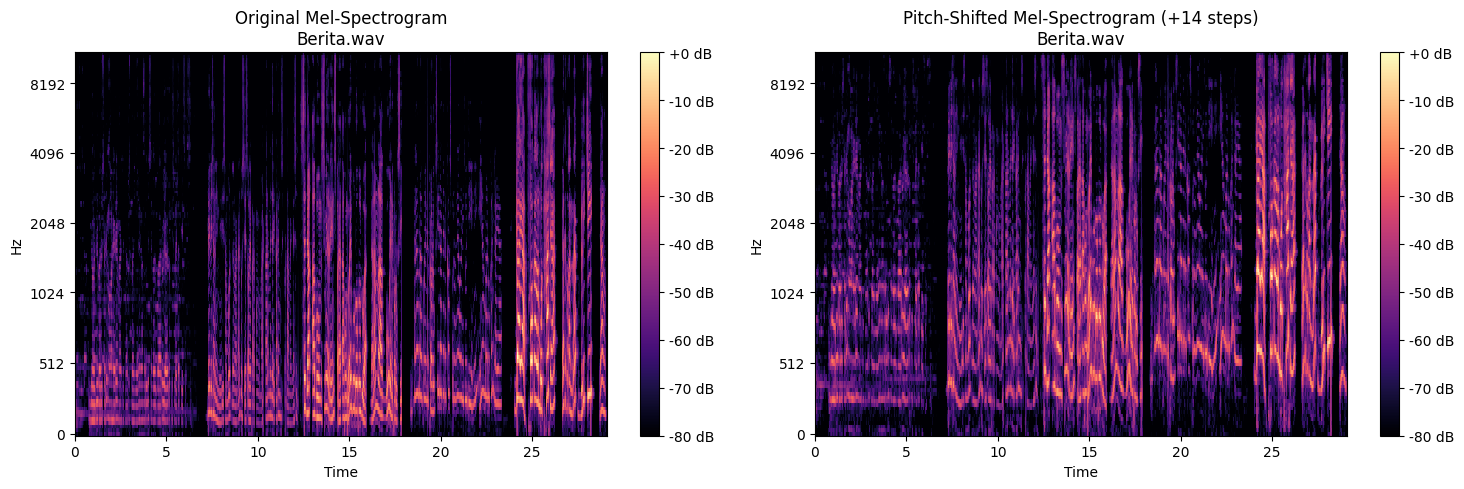

In [62]:
if shifted_signals:
    plt.figure(figsize=(15, 5))

    for i, (audio_path, shifted) in enumerate(zip(original_files, shifted_signals), 1):
        y_orig, sr = librosa.load(audio_path)
        
        mel_orig = librosa.feature.melspectrogram(y=y_orig, sr=sr, n_mels=128)
        mel_orig_db = librosa.power_to_db(mel_orig, ref=np.max)
        
        mel_shifted = librosa.feature.melspectrogram(y=shifted, sr=sr, n_mels=128)
        mel_shifted_db = librosa.power_to_db(mel_shifted, ref=np.max)
        
        plt.subplot(1, 2, 1)
        librosa.display.specshow(mel_orig_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Original Mel-Spectrogram\n{os.path.basename(audio_path)}')
        
        plt.subplot(1, 2, 2)
        librosa.display.specshow(mel_shifted_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Pitch-Shifted Mel-Spectrogram (+{pitch_shift_amount} steps)\n{os.path.basename(audio_path)}')

    plt.tight_layout()

In [63]:
pitch_shift_amount_7 = 7
shifted_signals_7 = []
original_files_7 = []

def save_audio_if_not_exists(audio_data, sample_rate, output_path):
    if os.path.exists(output_path):
        print(f"Output file already exists: {os.path.basename(output_path)}")
        return False
    sf.write(output_path, audio_data, sample_rate)
    print(f"Successfully saved: {os.path.basename(output_path)}")
    return True

for audio_path in audio_files:
    if audio_path.endswith('Berita.wav'):
        y, sr = librosa.load(audio_path)
        y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=pitch_shift_amount_7)
        shifted_signals_7.append(y_shifted)
        original_files_7.append(audio_path)
        
        output_path = os.path.join('WAV', f'pitched_{pitch_shift_amount_7}_{os.path.basename(audio_path)}')
        save_audio_if_not_exists(y_shifted, sr, output_path)

Successfully saved: pitched_7_Berita.wav


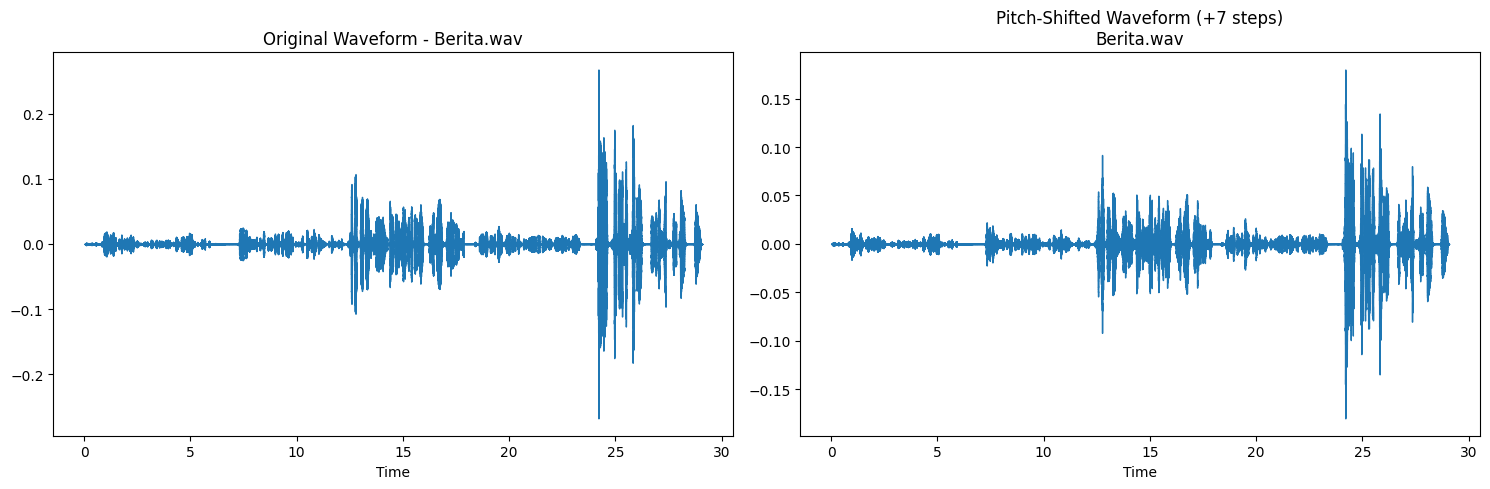

In [64]:
if shifted_signals_7:
    plt.figure(figsize=(15, 5))

    for i, (audio_path, shifted_7) in enumerate(zip(original_files_7, shifted_signals_7), 1):
        y_orig, sr = librosa.load(audio_path)
        
        plt.subplot(1, 2, 1)
        librosa.display.waveshow(y_orig, sr=sr)
        plt.title(f'Original Waveform - {os.path.basename(audio_path)}')
        
        plt.subplot(1, 2, 2)
        librosa.display.waveshow(shifted_7, sr=sr)
        plt.title(f'Pitch-Shifted Waveform (+{pitch_shift_amount_7} steps)\n{os.path.basename(audio_path)}')

    plt.tight_layout()

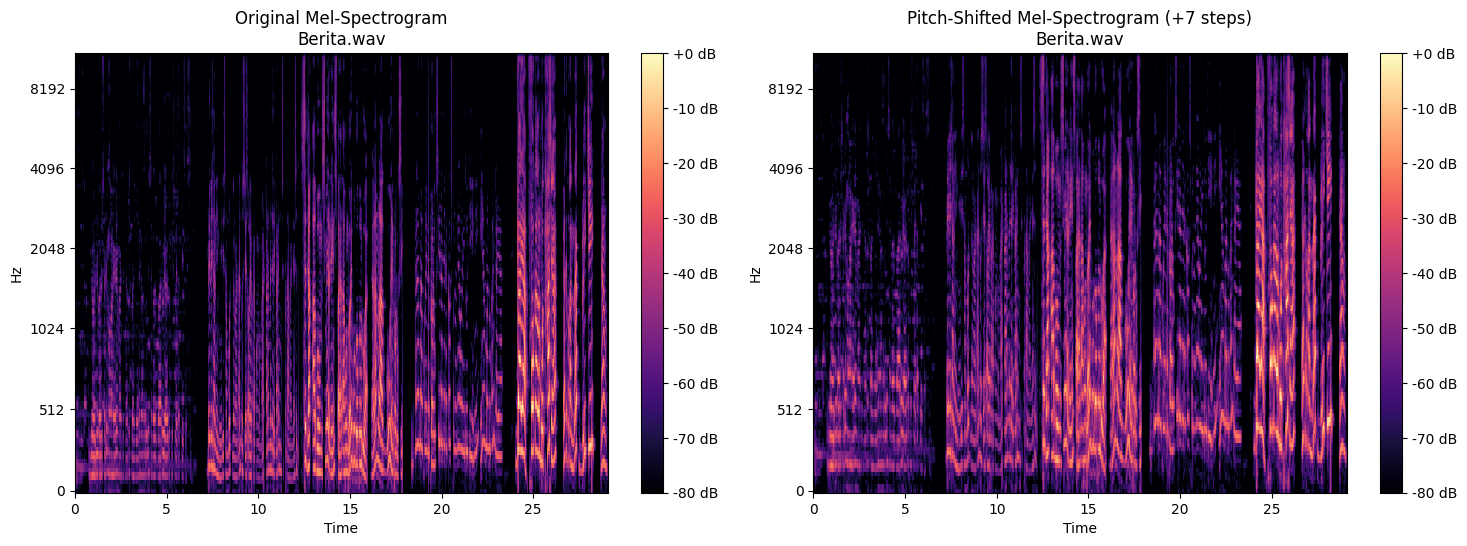

In [65]:
plt.figure(figsize=(15, 5*len(audio_files)))

for i, (audio_path, shifted_7) in enumerate(zip(audio_files, shifted_signals_7), 1):
    y_orig, sr = librosa.load(audio_path)
    
    mel_orig = librosa.feature.melspectrogram(y=y_orig, sr=sr, n_mels=128)
    mel_orig_db = librosa.power_to_db(mel_orig, ref=np.max)
    
    mel_shifted = librosa.feature.melspectrogram(y=shifted_7, sr=sr, n_mels=128)
    mel_shifted_db = librosa.power_to_db(mel_shifted, ref=np.max)
    
    plt.subplot(len(audio_files), 2, 2*i-1)
    librosa.display.specshow(mel_orig_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Original Mel-Spectrogram\n{os.path.basename(audio_path)}')
    
    plt.subplot(len(audio_files), 2, 2*i)
    librosa.display.specshow(mel_shifted_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Pitch-Shifted Mel-Spectrogram (+{pitch_shift_amount_7} steps)\n{os.path.basename(audio_path)}')

plt.tight_layout()

*1. Parameter yang digunakan* =  Pitch shift yang digunakan adalah +7 dan +14

*2. Perbedaan dalam representasi visual* = Pada waveform tidak terlihat jelas perbedaannya, beda halnya dengan spectogram dimana dibandingkan dengan audio yang original pada pitch +7 pada frekuensi sangat bawah telihat intensitas suaranya menghilang sementara frekuensi tengah ke tinggi intensitasnya lebih tinggi dan menyebar, pada pitch +14 sama halnya dengan pitch +7 hanya saja lebih signifikan perbedaannya, hal ini disebabkan karena suara dengan nada yang lebih tinggi akan memberi intensitas lebih ke frekuensi tengah dan tinggi dan frekuensi rendah mengrurang intensitasnya

*3. Pengaruh perubahan pitch pada kualitas suara* = Pada suara yang sudah di pitch suara berubah menjadi lebih nyaring dan bahkan melengking di bagian pitch +14, ada beberapa waktu suara bicara sudah tidak bisa dipahami lagi.

-----------------------------------------------------------------------------------------------------

SOAL 4: AUDIO PROCESSING CHAIN

Lakukan processing pada rekaman yang sudah di-pitch shift pada Soal 3 dengan
tahapan:

– Equalizer

    
 – Gain/fade

– Normalization

– Compression

– Noise Gate

 – Silence trimming
 
• Atur nilai target loudness ke-16 LUFS.
 
• Visualisasikan waveform dan spektrogram sebelum dan sesudah proses normalisasi.
 
 • Jelaskan:
    
– Perubahan dinamika suara yang terjadi

– Perbedaan antara normalisasi peak dan normalisasi LUFS
        
– Bagaimana kualitas suara berubah setelah proses normalisasi dan loudnessoptimization
        
– Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suar

d:\Audio Exercise\Audio-Exercise\.venv\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")


Successfully saved: processed_pitch_combined.wav


True

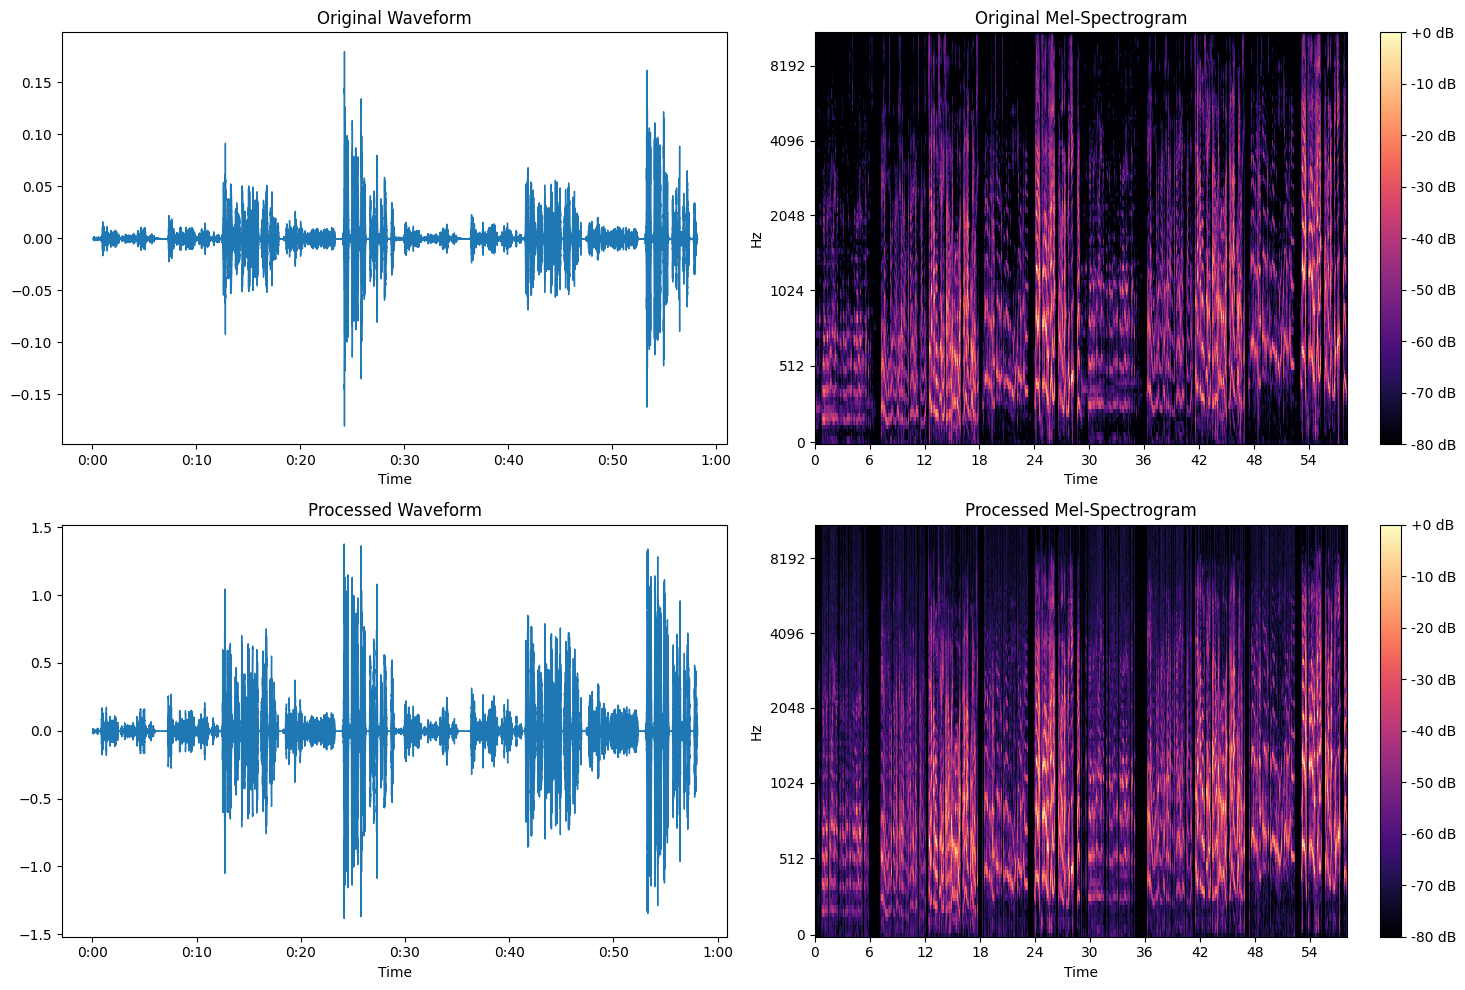

In [69]:
def apply_eq(audio, sr, bands):
    filtered = np.zeros_like(audio)
    for freq, gain in bands:
        nyquist = sr / 2
        low = max((freq - freq/2) / nyquist, 0.001)
        high = min((freq + freq/2) / nyquist, 0.999)
        b, a = butter(2, [low, high], btype='band')
        filtered += gain * filtfilt(b, a, audio)
    return filtered

def apply_gain_fade(audio, gain_db, fade_in_sec, fade_out_sec, sr):
    gain = 10 ** (gain_db/20)
    fade_in_len = int(fade_in_sec * sr)
    fade_out_len = int(fade_out_sec * sr)
    fade_in = np.linspace(0, 1, fade_in_len)
    fade_out = np.linspace(1, 0, fade_out_len)
    
    audio_out = audio * gain
    audio_out[:fade_in_len] *= fade_in
    audio_out[-fade_out_len:] *= fade_out
    return audio_out

def normalize_audio(audio):
    return audio / np.max(np.abs(audio))

def apply_compression(audio, threshold_db, ratio, attack_ms, release_ms, sr):
    threshold = 10 ** (threshold_db/20)
    attack_samples = int(attack_ms * sr / 1000)
    release_samples = int(release_ms * sr / 1000)
    
    env = np.abs(audio)
    gain_reduction = np.ones_like(audio)
    
    for i in range(len(audio)):
        if env[i] > threshold:
            reduction = (env[i]/threshold) ** (1/ratio - 1)
            gain_reduction[i] = reduction
    
    gain_reduction = filtfilt(
        [1/attack_samples] * attack_samples, [1],
        gain_reduction
    )
    return audio * gain_reduction

def apply_noise_gate(audio, threshold_db, sr):
    threshold = 10 ** (threshold_db/20)
    return np.where(np.abs(audio) < threshold, 0, audio)

def trim_silence(audio, threshold_db, sr):
    threshold = 10 ** (threshold_db/20)
    mask = np.abs(audio) > threshold
    edges = np.where(mask)[0]
    if len(edges) > 0:
        return audio[edges[0]:edges[-1]]
    return audio

def save_audio_if_not_exists(audio_data, sample_rate, output_path):
    if os.path.exists(output_path):
        print(f"Output file already exists: {os.path.basename(output_path)}")
        return False
    sf.write(output_path, audio_data, sample_rate)
    print(f"Successfully saved: {os.path.basename(output_path)}")
    return True

audio_path = os.path.join('WAV', 'pitch_combined.wav')
y, sr = librosa.load(audio_path)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Original Waveform')

plt.subplot(2, 2, 2)
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel-Spectrogram')

eq_bands = [(100, 1.2), (500, 0.8), (1000, 1.0), (2000, 1.1), (5000, 0.9)]
y_processed = apply_eq(y, sr, eq_bands)

y_processed = apply_gain_fade(y_processed, gain_db=3, fade_in_sec=0.1, fade_out_sec=0.1, sr=sr)

y_processed = normalize_audio(y_processed)

y_processed = apply_compression(y_processed, threshold_db=-20, ratio=4, attack_ms=5, release_ms=50, sr=sr)

y_processed = apply_noise_gate(y_processed, threshold_db=-50, sr=sr)

y_processed = trim_silence(y_processed, threshold_db=-50, sr=sr)

meter = pyln.Meter(sr)
loudness = meter.integrated_loudness(y_processed)
loudness_normalized = pyln.normalize.loudness(y_processed, loudness, -16.0)

plt.subplot(2, 2, 3)
librosa.display.waveshow(loudness_normalized, sr=sr)
plt.title('Processed Waveform')

plt.subplot(2, 2, 4)
mel_spec = librosa.feature.melspectrogram(y=loudness_normalized, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Processed Mel-Spectrogram')

plt.tight_layout()

output_path = os.path.join('WAV', 'processed_pitch_combined.wav')
save_audio_if_not_exists(loudness_normalized, sr, output_path)

*1. Perubahan Dinamika Suara*

Suara pembicara maupun noise mejadi lebih terdengar, tetapi suara noise hanya terdengar ketika ada suara bicara, artinya antara ucapan kata noise menjadi hilang. Suara dengan pitch +14 menjadi lebih terdengar daripada sebelumnya.

*2. Perbedaan antara normalisasi peak dan normalisasi LUFS*

Normalisasi peak bekerja dengan mencari titik puncak biasanya 0dB lalu menyesuaikan volume seluruh file agar sesuai dengan titik puncak tersebut

Sementara pada LUFS bekerja dengan menetukan titik tertenru misalnya di sini menjadi -16 LUFS lalu gain menyesuaikan seluruh file sehingga rata ratanya cocok dengan -16 LUFS. Normalisasi LUFS menjadi standard yang dipakai di zaman sekarang karena lebih cocok ke pendengaran manusia.

*3. Bagaimana kualitas suara berubah setelah dinormalisasi dan loudness optimization*

Kualitas suara berubah menjadi semakin keras sehingga suara bicara menjadi lebih terdengar dan noise pun menjadi lebih terdengar juga, tetapi dengan adanya noise gate noise hanya terdengar sedikit saat ada suara bicara. 

*4. Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suara*

Kelebihan: Fitur suara yang kecil yang ingin dicari bisa lebih dijelaskan lagi dengan pengoptimalan loudness

Kekurangan: Fitur yang tidak dibutuhkan/noise ikut menjadi lebih terdengar


-----------------------------------------------------------------------------------------------------

SOAL 5: MUSIC ANALYSIS AND REMIX

Pilih 2 buah (potongan) lagu yang memiliki vokal (penyanyi) dan berdurasi sekitar 1 menit:

– Lagu 1: Nuansa sedih, lambat

– Lagu 2: Nuansa ceria, cepat

 • Konversikan ke format WAV sebelum dimuat ke notebook.

 • Lakukan deteksi tempo (BPM) dan estimasi kunci (key) dari masing-masing lagu dan berikan analisis singkat.
 
 • Lakukan remix terhadap kedua lagu:
 
 – Time Stretch: Samakan tempo kedua lagu
 
 – Pitch Shift: Samakan kunci (key) kedua lagu
 
 – Crossfading: Gabungkan kedua lagu dengan efek crossfading
 
 – Filter Tambahan: Tambahkan filter kreatif sesuai keinginan (opsional)
 
 • Jelaskan proses dan parameter yang digunakan.
 
 • Tampilkan waveform dan spektrogram sesudah remix.
 
 • Jelaskan hasil remix yang telah dilakukan

In [71]:
# Load the audio files
sad_path = os.path.join('WAV', 'SadSong.wav')
fun_path = os.path.join('WAV', 'FunSong.wav')

def analyze_audio(file_path):
    y, sr = librosa.load(file_path)
    
    # Tempo detection
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = float(tempo)
    
    # Key detection
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    chroma_sum = np.sum(chroma, axis=1)
    key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    key_idx = np.argmax(chroma_sum)
    
    # Detect major/minor
    major_profile = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])
    minor_profile = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0])
    major_profile = np.roll(major_profile, key_idx)
    minor_profile = np.roll(minor_profile, key_idx)
    major_corr = np.corrcoef(chroma_sum, major_profile)[0, 1]
    minor_corr = np.corrcoef(chroma_sum, minor_profile)[0, 1]
    key_quality = 'major' if major_corr > minor_corr else 'minor'
    
    return {
        'tempo': tempo,
        'key': f"{key_names[key_idx]} {key_quality}",
        'audio': y,
        'sr': sr
    }

# Analyze both songs
sad_song = analyze_audio(sad_path)
fun_song = analyze_audio(fun_path)

print(f"SadSong Analysis:")
print(f"Tempo: {sad_song['tempo']:.1f} BPM")
print(f"Key: {sad_song['key']}")
print(f"\nFunSong Analysis:")
print(f"Tempo: {fun_song['tempo']:.1f} BPM")
print(f"Key: {fun_song['key']}")

C:\Users\HP\AppData\Local\Temp\ipykernel_47936\2997966039.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo = float(tempo)


SadSong Analysis:
Tempo: 112.3 BPM
Key: G major

FunSong Analysis:
Tempo: 107.7 BPM
Key: G# minor


In [ ]:
tempo_ratio = sad_song['tempo'] / fun_song['tempo']
y_stretched = librosa.effects.time_stretch(fun_song['audio'], rate=tempo_ratio)

def get_pitch_class(key):
    key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    return key_names.index(key.split()[0])

sad_pitch = get_pitch_class(sad_song['key'])
fun_pitch = get_pitch_class(fun_song['key'])
pitch_steps = sad_pitch - fun_pitch

y_shifted = librosa.effects.pitch_shift(y_stretched, sr=fun_song['sr'], n_steps=pitch_steps)

crossfade_duration = 10
crossfade_length = int(crossfade_duration * sad_song['sr'])

crossfade_start = len(sad_song['audio']) - crossfade_length
sad_fade_out = sad_song['audio'][crossfade_start:]
fun_fade_in = y_shifted[:crossfade_length]

t = np.linspace(0, 1, crossfade_length)
fade_curve = np.cos(t * np.pi / 2)
fade_in_curve = np.sin(t * np.pi / 2)

crossfade = sad_fade_out * fade_curve + fun_fade_in * fade_in_curve

final_mix = np.concatenate([
    sad_song['audio'][:crossfade_start],
    crossfade,
    y_shifted[crossfade_length:]
])

final_mix = librosa.util.normalize(final_mix)

def save_audio_if_not_exists(audio_data, sample_rate, output_path):
    if os.path.exists(output_path):
        print(f"Output file already exists: {os.path.basename(output_path)}")
        return False
    sf.write(output_path, audio_data, sample_rate)
    print(f"Successfully saved: {os.path.basename(output_path)}")
    return True

output_path = os.path.join('WAV', 'SadFun_remix.wav')
save_audio_if_not_exists(final_mix, sad_song['sr'], output_path)

Successfully saved: SadFun_remix.wav


True

In [ ]:
# Visualize the waveforms and spectrograms
plt.figure(figsize=(15, 15))

# Original SadSong
plt.subplot(3, 2, 1)
librosa.display.waveshow(sad_song['audio'], sr=sad_song['sr'])
plt.title('SadSong Waveform')

plt.subplot(3, 2, 2)
mel_spec = librosa.feature.melspectrogram(y=sad_song['audio'], sr=sad_song['sr'])
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sad_song['sr'], x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('SadSong Mel-Spectrogram')

# Adjusted FunSong
plt.subplot(3, 2, 3)
librosa.display.waveshow(y_shifted, sr=fun_song['sr'])
plt.title('Adjusted FunSong Waveform\n(Time-stretched and Pitch-shifted)')

plt.subplot(3, 2, 4)
mel_spec = librosa.feature.melspectrogram(y=y_shifted, sr=fun_song['sr'])
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=fun_song['sr'], x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Adjusted FunSong Mel-Spectrogram')

# Final Mix
plt.subplot(3, 2, 5)
librosa.display.waveshow(final_mix, sr=sad_song['sr'])
plt.title('Final Mix Waveform')

plt.subplot(3, 2, 6)
mel_spec = librosa.feature.melspectrogram(y=final_mix, sr=sad_song['sr'])
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
librosa.display.specshow(mel_spec_db, sr=sad_song['sr'], x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Final Mix Mel-Spectrogram')

plt.tight_layout()

*PROSES YANG DILAKUKAN*
Time Stretch: Tempo lagu kedua lebih rendah dibandingkan tempo lagu pertama, time stretch dilakukan pada lagu kedua untuk menyamakan tempo ke lagu pertama

Pitch Shift: Pitch dari lagu kedua lebih satu dibandingkan lagu pertama dimana lagu pertama kunci G dan lagu Kedua G#, down ptich dilakukan ke lagu kedua untuk menyamakan dengan lagu kesatu

Crossfading: Lagu pertama diberi crossfading 10 detik menuju lagu kedua agar transisi terdengar tidak kaku dan seemless

*PENJELASAN REMIX*

Lagu sedih pelan: White Ferrari by Frank Ocean

Lagu ceria cepat: Loud Spaces by jamie xx

Lagu pertama merupakan white ferrari dan lagu adalah Loud Spaces. Lagu kedua di mix dengan lagu kesatu saat interlude dengan crossfade agar terdengar rapih dan tidak kaku
